In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [31]:
#Generate random list of cities

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [32]:
#API call to get city information

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Set up lists to hold response info
found_cities = []
lat = []
lng = []
maxtemp = []
humidity = []
cloud = []
windspeed = []
country = []
date = []
counter = 0

#Loop through list of cities and perform data request
for city in cities:
    response = requests.get(query_url + city).json()

    time.sleep(1)
    try:
        found_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        counter += 1
        print(f"Successful request {counter}: {city}")
    except:
       print("City not found")
       pass
print("Request complete")

Successful request 1: bagotville
Successful request 2: wuwei
Successful request 3: ponta delgada
Successful request 4: port blair
Successful request 5: berlevag
Successful request 6: kapaa
Successful request 7: ushuaia
Successful request 8: santander
Successful request 9: hermanus
Successful request 10: roald
Successful request 11: pacific grove
Successful request 12: butaritari
Successful request 13: alyangula
Successful request 14: inhambane
Successful request 15: rikitea
City not found
Successful request 16: hithadhoo
Successful request 17: rocha
Successful request 18: ahuimanu
City not found
City not found
Successful request 19: hilo
Successful request 20: vao
Successful request 21: puerto ayora
Successful request 22: horana
Successful request 23: bredasdorp
Successful request 24: port augusta
Successful request 25: mataura
Successful request 26: kropotkin
City not found
Successful request 27: gizo
Successful request 28: dali
Successful request 29: bluff
Successful request 30: mar 

Successful request 240: georgetown
Successful request 241: zeerust
Successful request 242: saskylakh
Successful request 243: muzaffarpur
Successful request 244: rum
Successful request 245: saint-joseph
Successful request 246: geraldton
City not found
Successful request 247: beaverlodge
Successful request 248: asau
Successful request 249: sorland
City not found
Successful request 250: antsohihy
Successful request 251: am timan
Successful request 252: ola
Successful request 253: benguela
Successful request 254: portalegre
City not found
Successful request 255: santa maria del oro
Successful request 256: tursunzoda
Successful request 257: placerville
Successful request 258: nouakchott
Successful request 259: winsum
Successful request 260: provideniya
Successful request 261: moose factory
Successful request 262: tinskoy
Successful request 263: aklavik
Successful request 264: aguimes
Successful request 265: cozumel
Successful request 266: batsfjord
Successful request 267: puerto baquerizo m

Successful request 480: salalah
Successful request 481: yarovoye
Successful request 482: chuy
Successful request 483: griffith
Successful request 484: okhotsk
Successful request 485: mananjary
City not found
Successful request 486: sistranda
Successful request 487: bairiki
Successful request 488: ebolowa
Successful request 489: carbonia
Successful request 490: bhatkal
Successful request 491: suba
Successful request 492: pilar
Successful request 493: san joaquin
Successful request 494: mata
Successful request 495: seymchan
Successful request 496: macusani
Successful request 497: boden
Successful request 498: poya
Successful request 499: det udom
Successful request 500: dhidhdhoo
City not found
City not found
Successful request 501: solnechnyy
Successful request 502: turayf
Successful request 503: jakar
Successful request 504: marsa matruh
Successful request 505: langham
Successful request 506: marawi
Successful request 507: narbonne
Successful request 508: makasar
Successful request 509

In [40]:
#Convert raw data to dataframe

zipped_lists = zip(found_cities, lat, lng, maxtemp, humidity, cloud, windspeed, country, date)

cities_df = pd.DataFrame(zipped_lists)

cities_df = cities_df.rename(columns = {
        0 : "City",
        1 : "Lat",
        2 : "Lng",
        3 : "Max Temp",
        4 : "Humidity",
        5 : "Cloudiness",
        6 : "Wind Speed",
        7 : "Country",
        8 : "Date"})

cities_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [62]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bagotville,-28.98,153.42,55.00,87,0,6.93,AU,1595184112
1,Wuwei,37.93,102.64,66.00,54,58,4.21,CN,1595184113
2,Ponta Delgada,37.73,-25.67,71.60,64,75,11.41,PT,1595184115
3,Port Blair,11.67,92.75,81.54,79,100,3.74,IN,1595184116
4,Berlevåg,70.86,29.09,54.99,93,100,9.33,NO,1595184117


In [44]:
#Look for cities with greater than 100% humidity

humid100 = cities_df.loc[cities_df["Humidity"] > 100]

humid100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [46]:
# Export the City_Data into a csv
cities_df.to_csv(output_data_file, encoding="utf-8", index=False)

## Plotting the Data

In [82]:
# Read data from saved csv
citydata_df = pd.read_csv(output_data_file)


## Latitude vs. Temperature Plot

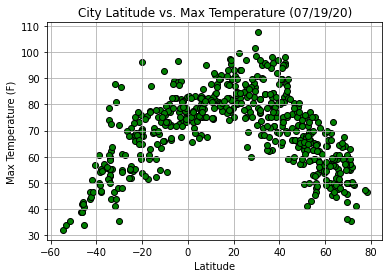

In [165]:
x_axis = citydata_df["Lat"]
y_axis = citydata_df["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o",facecolors="g", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("output_data/img1.png")
plt.show()

## Latitude vs. Humidity Plot

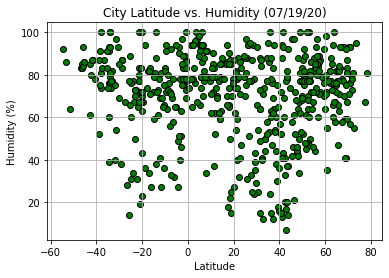

In [166]:
x_axis = citydata_df["Lat"]
y_axis = citydata_df["Humidity"]

plt.scatter(x_axis, y_axis, marker="o",facecolors="g", edgecolors="black")
plt.title("City Latitude vs. Humidity (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("output_data/img2.png")
plt.show()

## Latitude vs. Cloudiness Plot

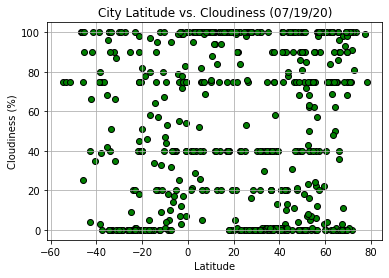

In [167]:
x_axis = citydata_df["Lat"]
y_axis = citydata_df["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o",facecolors="g", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("output_data/img3.png")
plt.show()

## Latitude vs. Wind Speed Plot

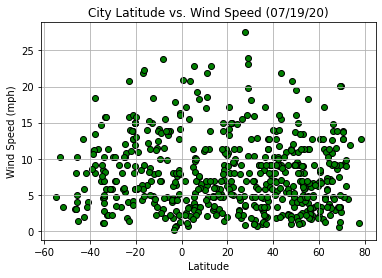

In [168]:
x_axis = citydata_df["Lat"]
y_axis = citydata_df["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o",facecolors="g", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("output_data/img4.png")
plt.show()

## Linear Regression

In [169]:
# OPTIONAL: Create a function to create Linear Regression plots

def regrfunction(x_value, y_value, eqx, eqy):
    x_values = x_value
    y_values = y_value
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, marker="o",facecolors="g", edgecolors="black")
    plt.annotate(line_eq,(eqx,eqy),fontsize=15,color="red")
    plt.plot(x_values,regress_values,"r-")
    plt.grid()
    print(f"The r-squared is: {rvalue**2}")

In [170]:
# Create Northern and Southern Hemisphere DataFrames
northhem_df = citydata_df.loc[citydata_df["Lat"] >= 0, :]
southhem_df = citydata_df.loc[citydata_df["Lat"] < 0, :]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere

The r-squared is: 0.48619056002706035


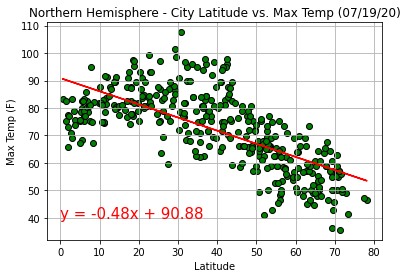

In [171]:
regrfunction(northhem_df["Lat"],northhem_df["Max Temp"], 0, 40)

plt.title("Northern Hemisphere - City Latitude vs. Max Temp (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/img5.png")
plt.show()

####  Southern Hemisphere

The r-squared is: 0.5928183840465139


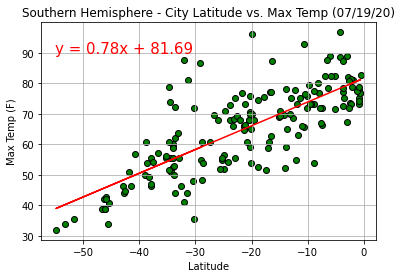

In [172]:
regrfunction(southhem_df["Lat"],southhem_df["Max Temp"], -55, 90)

plt.title("Southern Hemisphere - City Latitude vs. Max Temp (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/img6.png")
plt.show()

#### Observations

The charts are looking at the correlation between the latitude of the city and the maximum temperature in that city.  In the northern hemisphere, there appears to be a negative correlation of temperature to latitude - temperate decreases as latitude increases (gets further from the equator).  In the southern hemisphere, there appears to be a positive correlation of temperature to latitude - temperature increases as latitude increases (gets closer to the equator).   

###  Humidity(%) vs. Latitude Linear Regression

####  Northern Hemisphere

The r-squared is: 0.0002523352883891976


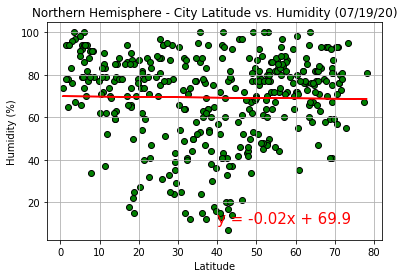

In [173]:
regrfunction(northhem_df["Lat"],northhem_df["Humidity"], 40, 10)

plt.title("Northern Hemisphere - City Latitude vs. Humidity (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/img7.png")
plt.show()

####  Southern Hemisphere

The r-squared is: 0.031265039857287916


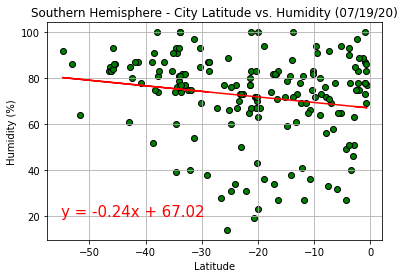

In [174]:
regrfunction(southhem_df["Lat"],southhem_df["Humidity"], -55, 20)

plt.title("Southern Hemisphere - City Latitude vs. Humidity (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/img8.png")
plt.show()

#### Observations

The charts are looking at the correlation between the latitude of the city and the humidity percentage in that city.  There doesn't appear to be much correlation between a city's humidity percentage and it's distance from the equator.  It does appear that there are more cities in both hemispheres with higher humidity (75% and higher). 

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere

The r-squared is: 0.005511626883678975


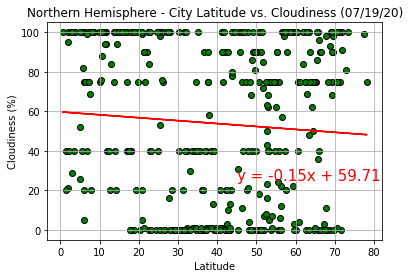

In [175]:
regrfunction(northhem_df["Lat"],northhem_df["Cloudiness"], 45, 25)

plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/img9.png")
plt.show()

####  Southern Hemisphere

The r-squared is: 0.003225125683434187


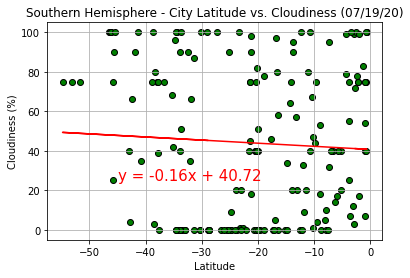

In [176]:
regrfunction(southhem_df["Lat"],southhem_df["Cloudiness"], -45, 25)

plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/img10.png")
plt.show()

#### Observations

The charts are looking at the correlation between the latitude of the city and the cloudiness percentage in that city.  There doesn't appear to be much correlation between a city's cloudiness percentage and its distance from the equator.

###  Wind Speed (mph) vs. Latitude Linear Regression

####  Northern Hemisphere

The r-squared is: 0.0036123931542288625


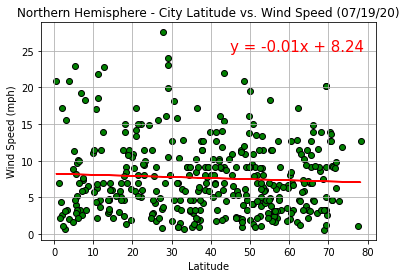

In [177]:
regrfunction(northhem_df["Lat"],northhem_df["Wind Speed"], 45, 25)

plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/img11.png")
plt.show()

####  Southern Hemisphere

The r-squared is: 0.010907884596778333


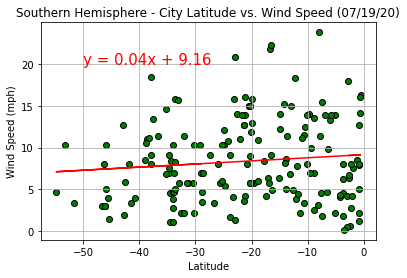

In [178]:
regrfunction(southhem_df["Lat"],southhem_df["Wind Speed"], -50, 20)

plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/img12.png")
plt.show()

#### Observations

The charts are looking at the correlation between the latitude of the city and the average wind speed in that city.  There doesn't appear to be much correlation between a city's wind speed and it's distance from the equator.  In the Northern Hemisphere, there are more cities that have a lower average wind speed (less than 10 mph).